# Over-fitting (20 minutes)
ACPSEM Machine Learning Workshop 2019, 29 - 31 May 2019

Yu Sun, yu.sun@sydney.edu.au

University of Sydney

In this session, we will look at a case of over-fitting. This will emphasise the need for data partitioning. First let's generate some sample data for a regression task.

In [0]:
# Import libraries
import numpy as np

# Generate some x values
np.random.seed(1234)
x = np.random.randn(30)

# Define a function to generate the data
def genData(x):
  '''Returns the GROUND TRUTH y for the given x'''
  y = np.exp(0.5*x+1) # use an exponential function
  return y

# Generate some data
y_true = genData(x)

# The observed data (data with noise)
noise = np.random.randn(y_true.size)
y = y_true + noise

Here we use an exponential function (`np.exp()`) as the ground truth. Let's have a look at the data.

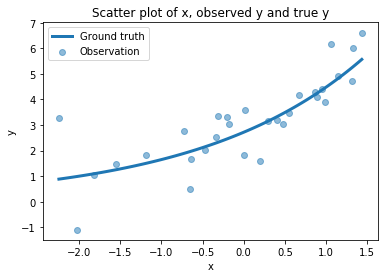

In [0]:
# Define a function to plot the data
import matplotlib.pyplot as plt

# Plot the observed data
plt.scatter(x=x, y=y, alpha=0.5, label='Observation')

# Plot the ground truth data
x_grid = np.linspace(x.min(), x.max(), 100)
plt.plot(x_grid, genData(x_grid), linewidth=3, label='Ground truth')

# Configure and show the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x, observed y and true y')
plt.legend(loc='best')
plt.show()

Now let's fit the data with polynomials with incrementing degrees.

In [0]:
# Import the function
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define a function to fit the model
def polyExp(x, n):
  '''Fitting the data x using n-degree polynomials.'''
  # Get the polynomial expansions
  poly = PolynomialFeatures(degree=n)
  x_poly = poly.fit(x[:,np.newaxis]).transform(x[:,np.newaxis])
  return x_poly

For a given $x$ and $n$, the polynomial expasion will be

$$polyExp(x)=x^0, x^1, x^2, ..., x^n$$

In [0]:
# Test the polyExp()
x_poly = polyExp(x, 3)
print("The 3rd-degree polynomial expasion for", x[0], "is", x_poly[0])

The 3rd-degree polynomial expasion for 0.47143516373249306 is [1.         0.47143516 0.22225111 0.10477699]


Now, we can do a polynomial fit at different degrees.

In [0]:
# Define a function to do that fitting
def polyFit(x, y, n):
  '''Return the n-th order polynomial regression for (x, y)'''
  x_poly = polyExp(x, n)
  # Polynomial regression is simply linear regression including polynomial terms
  reg = LinearRegression()
  reg.fit(x_poly, y)
  return reg

Now we can test `polyFit()` and include the 3rd-degree polynomial fit in the plot.

In [0]:
# Get the fitted model
reg = polyFit(x, y, 3)

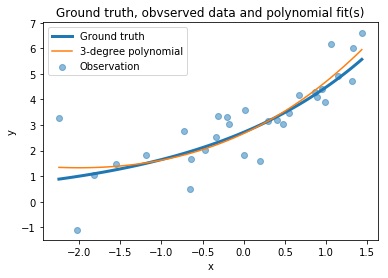

In [0]:
# Plot the observed data
plt.scatter(x=x, y=y, alpha=0.5, label='Observation')

# Plot the ground truth data
x_grid = np.linspace(x.min(), x.max(), 100)
plt.plot(x_grid, genData(x_grid), linewidth=3, label='Ground truth')

################## The extra lines of code #########################
# Plot the polynomial fit
plt.plot(x_grid, reg.predict(polyExp(x_grid,3)), 
         label='3-degree polynomial')
####################################################################

# Configure and show the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ground truth, obvserved data and polynomial fit(s)')
plt.legend(loc='best')
plt.show()

Exercise: refer to how the 3rd-order polynomial regression, add to the plot the 1st, 2nd, 4th and 5th order polynomials. Compare your code with the followings.

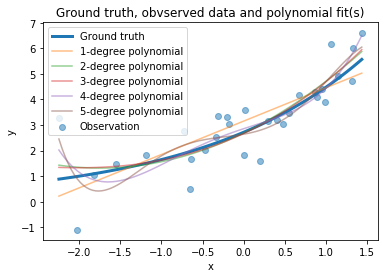

In [0]:
# Plot the observed data
plt.scatter(x=x, y=y, alpha=0.5, label='Observation')

# Plot the ground truth data
x_grid = np.linspace(x.min(), x.max(), 100)
plt.plot(x_grid, genData(x_grid), linewidth=3, label='Ground truth')

################## The extra lines of code #########################
# Plot the polynomial fits
for n in [1,2,3,4,5]:
  reg = polyFit(x, y, n)
  plt.plot(x_grid, reg.predict(polyExp(x_grid,n)), alpha=0.5,
              label=str(n) + '-degree polynomial')
####################################################################

# Configure and show the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ground truth, obvserved data and polynomial fit(s)')
plt.legend(loc='best')
plt.show()

Exercise: do the same for up to 15. 

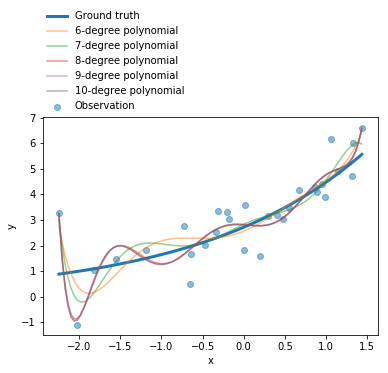

In [0]:
# 6 to 10
# Plot the observed data
plt.scatter(x=x, y=y, alpha=0.5, label='Observation')
# Plot the ground truth data
x_grid = np.linspace(x.min(), x.max(), 100)
plt.plot(x_grid, genData(x_grid), linewidth=3, label='Ground truth')
# Plot the polynomial fit
for n in [6,7,8,9,10]:
  reg = polyFit(x, y, n)
  plt.plot(x_grid, reg.predict(polyExp(x_grid,n)), alpha=0.5,
              label=str(n) + '-degree polynomial')
# Configure and show the plot
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), 
            borderaxespad=0, frameon=False)
plt.show()

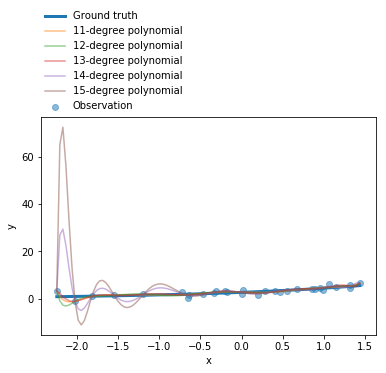

In [0]:
# 11 to 15
# Plot the observed data
plt.scatter(x=x, y=y, alpha=0.5, label='Observation')
# Plot the ground truth data
x_grid = np.linspace(x.min(), x.max(), 100)
plt.plot(x_grid, genData(x_grid), linewidth=3, label='Ground truth')
# Plot the polynomial fit
for n in [11,12,13,14,15]:
  reg = polyFit(x, y, n)
  plt.plot(x_grid, reg.predict(polyExp(x_grid,n)), alpha=0.5,
              label=str(n) + '-degree polynomial')
# Configure and show the plot
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), 
            borderaxespad=0, frameon=False)

plt.show()

We can calculate the mean square error (MSE) agains the degree of polynomial:

$$MSE=\sqrt{\frac{[y_{ob}-y_{pred}]^2}{N}}$$

where $y_{ob}$ is the observed data (training data), $y_{pred}$ is the predicted value and $N$ is the number of samples.

In [0]:
# Define a function to calculate MSE
def calMSE(y, y_pred):
  '''Calculate the MSE given y and predicted y.'''
  return np.sqrt(((y-y_pred)**2).mean()) # Power indicated by **

In [0]:
# Calculate the corresponding MSE
degrees = range(1, 16) # 1 to 15
mse_s = []
for n in degrees:
  y_pred = polyFit(x, y, n).predict(polyExp(x, n))
  mse = calMSE(y, y_pred)
  mse_s.append(mse)

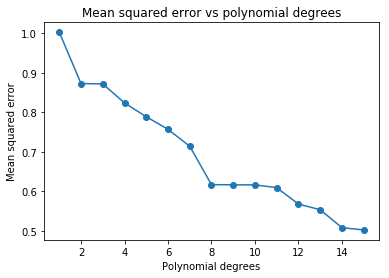

In [0]:
# Plot the MSE against the polynomial degrees
plt.plot(degrees, mse_s, '-o')
plt.xlabel('Polynomial degrees')
plt.ylabel('Mean squared error')
plt.title('Mean squared error vs polynomial degrees')
plt.show()

We can see that the MSE is always decreasing. However, at some point, the model lowers its MSE by fitting the non-important information in the data given, which is not generalisable to other data.

Data partitioning is the easist way to detect over-fitting.

In [0]:
# Partition the data into training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=0)

Now we do the previous plot again, but plot the training and test data seperately.

In [0]:
# Calculate the training MSE
degrees = range(1, 11) # 1 to 10
mse_s_tr = [] # training MSE
mse_s_ts = [] # test MSE
for n in degrees:
  # Calculate training MSE
  y_pred_tr = polyFit(x_train, y_train, n).predict(polyExp(x_train, n))
  mse_tr = calMSE(y_train, y_pred_tr)
  mse_s_tr.append(mse_tr)
  # Calculate test MSE
  y_pred_ts = polyFit(x_train, y_train, n).predict(polyExp(x_test, n))
  mse_ts = calMSE(y_test, y_pred_ts)
  mse_s_ts.append(mse_ts)

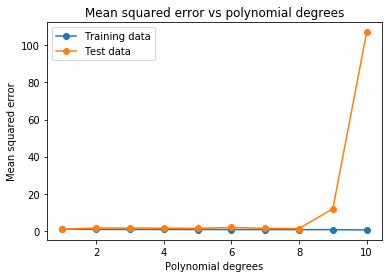

In [0]:
# Plot the MSE 
plt.plot(degrees, mse_s_tr, '-o', label='Training data')
plt.plot(degrees, mse_s_ts, '-o', label='Test data')
plt.legend(loc='best')
plt.xlabel('Polynomial degrees')
plt.ylabel('Mean squared error')
plt.title('Mean squared error vs polynomial degrees')
plt.show()

Can you see at which point the overfitting starts? Why?

In [0]:
# Print the session information for reproducibility purposes
import IPython
print(IPython.sys_info())



---

This is the end of the session.